##Introduction to dataset.

#### Possum are nocturnal marsupials native to Australia. They play an important role in enviornment by spreading seeds and pollen and help forest grow and regenerate. In urban areas, however, possum can sometimes cause trouble by nesting into roofs and damagaing garden. Despite this, they remain as essential part of Australia's wildlife and contribute great to country diversity.     

##Importing the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import statsmodels.api as sm


In [3]:
df=pd.read_csv("possum.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      103 non-null    float64
 1   site      103 non-null    float64
 2   Pop       103 non-null    object 
 3   gender    104 non-null    object 
 4   age       101 non-null    object 
 5   hdlngth   102 non-null    float64
 6   skullw    103 non-null    object 
 7   totlngth  103 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    object 
 10  earconch  104 non-null    float64
 11  eye       103 non-null    float64
 12  chest     104 non-null    float64
 13  belly     102 non-null    object 
dtypes: float64(8), object(6)
memory usage: 11.5+ KB


In [4]:
for col in df.columns:
    print(col)
    print(df[col].unique())

case
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  nan  96.  97.  98.
  99. 100. 101. 102. 103. 104.]
site
[ 1.  2.  3.  4.  5.  6.  7. nan]
Pop
['Vic' 'other' nan]
gender
['m' 'f']
age
['8.4' '6.2' '6.5' '6.6' '2.1' '1.1' '2.2' '6.3' '9.3' '6.4' '9.4' '5.2'
 '5.4' '3.3' '5,6' nan '1.2' '2.4' '5.7' '4.2' '3.6' '3.2' '4.3' '7.2'
 '2.5' '4.5' '2.6' '3.4' '4.7' '7.3' '7,3' '1.3' '5.3' '3,4' '6.7' '3.1'
 '7.8' '3.8' '4.1' '3.7' '2.3' '7.6' '6.8' '3.5' '5.9' '5.8' '7.4' '6.9'
 '1.5' '4.8' '1.6' '1.4' '4.9' '3' '6.1' '2.7' '7.9' '4.6' '3.9' '1.7']
hdlngth
[ 94.1  92.5

In [5]:
df.head()

,case,site,Pop,gender,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1.0,1.0,Vic,m,8.4,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36
1,2.0,1.0,Vic,f,6.2,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33
2,3.0,1.0,Vic,f,6.5,94.0,60,95.5,39.0,75.4,51.9,15.5,30.0,34
3,4.0,1.0,Vic,f,6.6,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34
4,5.0,1.0,Vic,f,2.1,91.5,56.3,85.5,36.0,71,53.2,15.1,28.5,33


In [7]:
# Convert selected columns to numeric type, coercing invalid entries to NaN for consistency
df[["age","skullw","footlgth","belly"]]=df[["age","skullw","footlgth","belly"]].apply(pd.to_numeric, errors="coerce")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      103 non-null    float64
 1   site      103 non-null    float64
 2   Pop       103 non-null    object 
 3   gender    104 non-null    object 
 4   age       98 non-null     float64
 5   hdlngth   102 non-null    float64
 6   skullw    102 non-null    float64
 7   totlngth  103 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  102 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       103 non-null    float64
 12  chest     104 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(12), object(2)
memory usage: 11.5+ KB


In [9]:
# Checking for null values
df.isnull().sum()

,0
case,1
site,1
Pop,1
gender,0
age,6
hdlngth,2
skullw,2
totlngth,1
taill,0
footlgth,2


In [10]:
# Replacing the sequential error with the sequence.
df["case"]=df["case"].fillna("95")
df["case"]=pd.to_numeric(df["case"])

In [11]:
df.isnull().sum()

,0
case,0
site,1
Pop,1
gender,0
age,6
hdlngth,2
skullw,2
totlngth,1
taill,0
footlgth,2


In [12]:
# Replacing the null values with the mode.
df["Pop"] = df["Pop"].fillna(df["Pop"].mode()[0])

In [13]:
df.isnull().sum()

,0
case,0
site,1
Pop,0
gender,0
age,6
hdlngth,2
skullw,2
totlngth,1
taill,0
footlgth,2


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    float64
 1   site      103 non-null    float64
 2   Pop       104 non-null    object 
 3   gender    104 non-null    object 
 4   age       98 non-null     float64
 5   hdlngth   102 non-null    float64
 6   skullw    102 non-null    float64
 7   totlngth  103 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  102 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       103 non-null    float64
 12  chest     104 non-null    float64
 13  belly     101 non-null    float64
dtypes: float64(12), object(2)
memory usage: 11.5+ KB


In [15]:
# Replacing the null values with the median.
cols = ["age", "hdlngth", "skullw", "totlngth", "footlgth", "eye", "belly","site"]
df[cols] = df[cols].fillna(df[cols].median())

In [16]:
df.isnull().sum()

,0
case,0
site,0
Pop,0
gender,0
age,0
hdlngth,0
skullw,0
totlngth,0
taill,0
footlgth,0


In [17]:
for col in df.columns:
    print(col)
    print(df[col].unique())

case
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104.]
site
[1. 2. 3. 4. 5. 6. 7.]
Pop
['Vic' 'other']
gender
['m' 'f']
age
[8.4  6.2  6.5  6.6  2.1  1.1  2.2  6.3  9.3  6.4  9.4  5.2  5.4  3.3
 3.75 1.2  2.4  5.7  4.2  3.6  3.2  4.3  7.2  2.5  4.5  2.6  3.4  4.7
 7.3  1.3  5.3  6.7  3.1  7.8  3.8  4.1  3.7  2.3  7.6  6.8  3.5  5.9
 5.8  7.4  6.9  1.5  4.8  1.6  1.4  4.9  3.   6.1  2.7  7.9  4.6  3.9
 1.7 ]
hdlngth
[ 94.1  92.5  94.   93.2  91.5  93.1  95.3  94.8  93.4  91.8  93.3  94.9
  95.1  95.4  92.9  91.6  94.

#### Replacing the error values with the medians


In [18]:
df["skullw"].replace([2500., 200.],df["skullw"].median(), inplace=True)

/tmp/ipython-input-301968177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["skullw"].replace([2500., 200.],df["skullw"].median(), inplace=True)


In [19]:
df["footlgth"].replace([1500.],df["footlgth"].median(), inplace=True)

/tmp/ipython-input-3854502615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["footlgth"].replace([1500.],df["footlgth"].median(), inplace=True)


In [20]:
df["belly"].replace([-12., 1230.],df["belly"].median(), inplace=True)

/tmp/ipython-input-97000721.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["belly"].replace([-12., 1230.],df["belly"].median(), inplace=True)


In [21]:
df["earconch"].replace([-14.],df["earconch"].median(), inplace=True)

/tmp/ipython-input-1958592131.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["earconch"].replace([-14.],df["earconch"].median(), inplace=True)


In [22]:
df["taill"].replace([-22.],df["taill"].median(), inplace=True)

/tmp/ipython-input-2378525110.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["taill"].replace([-22.],df["taill"].median(), inplace=True)


In [23]:
# Maintaining a proper numerical order.
for x in df.select_dtypes(include="number").columns:
    df[x]=df[x].round(1)

In [24]:
for x in df.columns:
    print(x)
    print(df[x].unique())

case
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104.]
site
[1. 2. 3. 4. 5. 6. 7.]
Pop
['Vic' 'other']
gender
['m' 'f']
age
[8.4 6.2 6.5 6.6 2.1 1.1 2.2 6.3 9.3 6.4 9.4 5.2 5.4 3.3 3.8 1.2 2.4 5.7
 4.2 3.6 3.2 4.3 7.2 2.5 4.5 2.6 3.4 4.7 7.3 1.3 5.3 6.7 3.1 7.8 4.1 3.7
 2.3 7.6 6.8 3.5 5.9 5.8 7.4 6.9 1.5 4.8 1.6 1.4 4.9 3.  6.1 2.7 7.9 4.6
 3.9 1.7]
hdlngth
[ 94.1  92.5  94.   93.2  91.5  93.1  95.3  94.8  93.4  91.8  93.3  94.9
  95.1  95.4  92.9  91.6  94.7  93.5  94.4  95.9  96.3  95.8  96.   90.5
  92.8  92.1  

In [25]:
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.586538,4.192308,92.620192,56.707692,87.074038,37.038462,68.474038,48.134615,15.045192,27.000000,32.557692
std,30.166206,2.325922,1.900419,3.562245,2.939278,4.304908,1.936733,4.354888,4.107931,1.050463,2.045597,2.732675
min,1.000000,1.000000,1.100000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.925000,90.700000,54.975000,84.000000,36.000000,64.775000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.800000,92.800000,56.400000,88.000000,37.000000,68.100000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.400000,94.725000,58.000000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.000000
max,104.000000,7.000000,9.400000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [26]:
df.columns

Index(['case', 'site', 'Pop', 'gender', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    float64
 1   site      104 non-null    float64
 2   Pop       104 non-null    object 
 3   gender    104 non-null    object 
 4   age       104 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  104 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(12), object(2)
memory usage: 11.5+ KB


age


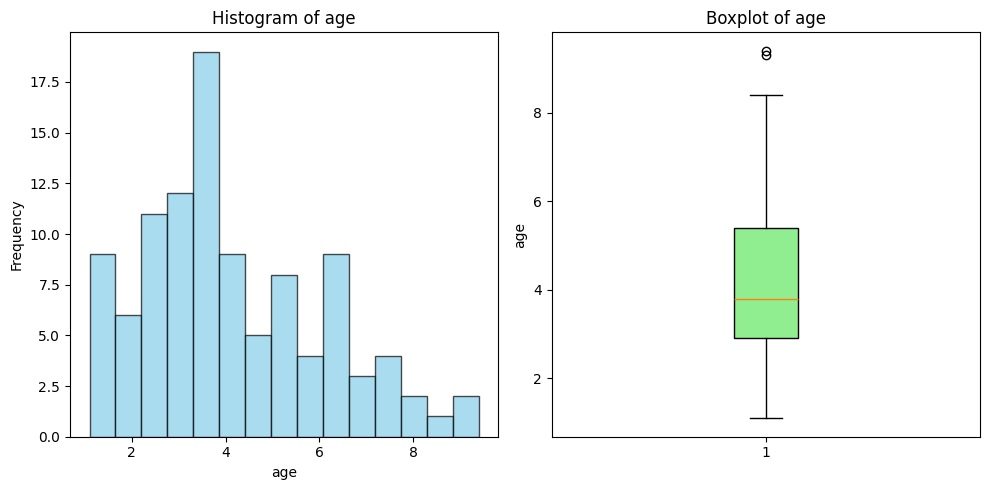

Y STATISTICS
Skewness ---- 0.587
Kurtosis ---- -0.218

hdlngth


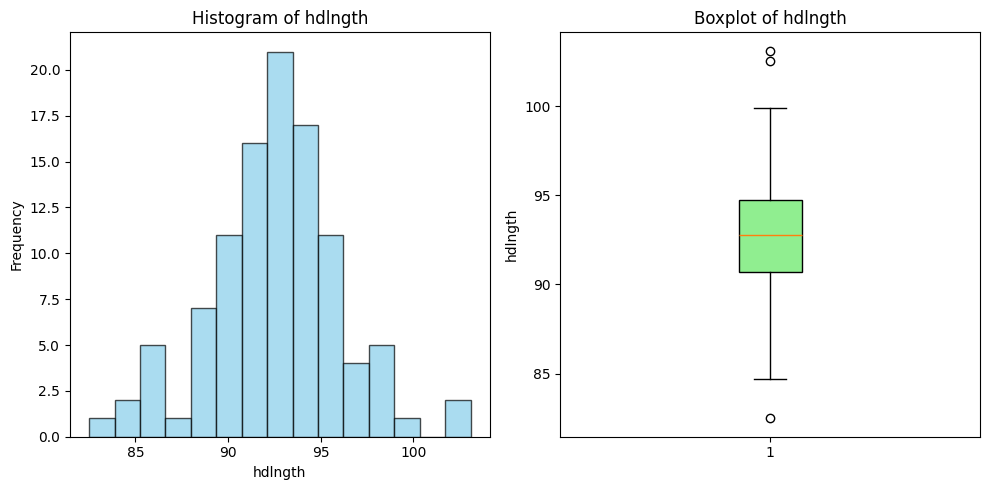

Y STATISTICS
Skewness ---- -0.067
Kurtosis ---- 0.837

skullw


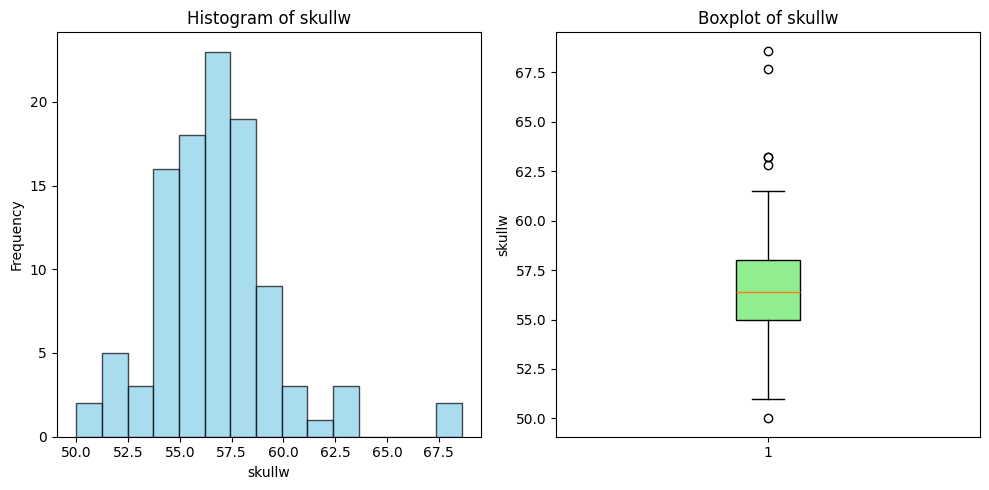

Y STATISTICS
Skewness ---- 1.101
Kurtosis ---- 3.330

totlngth


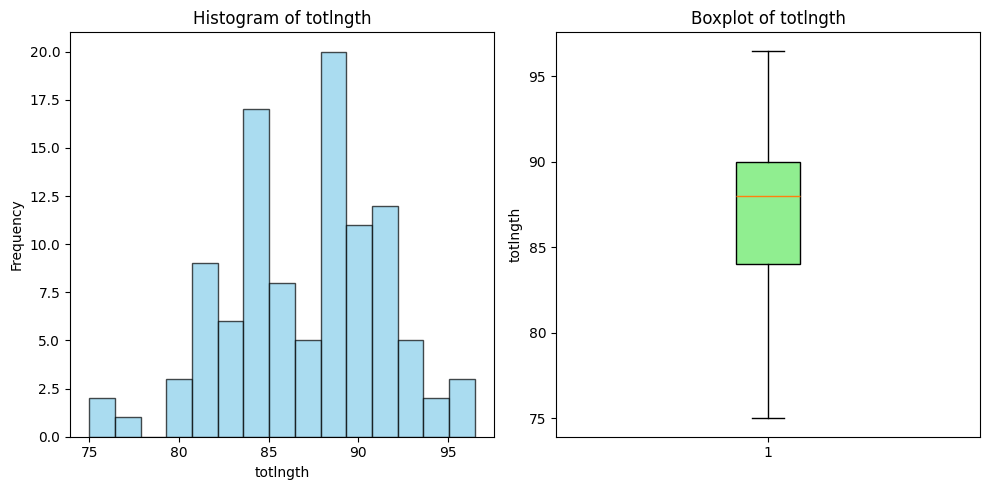

Y STATISTICS
Skewness ---- -0.274
Kurtosis ---- -0.146

taill


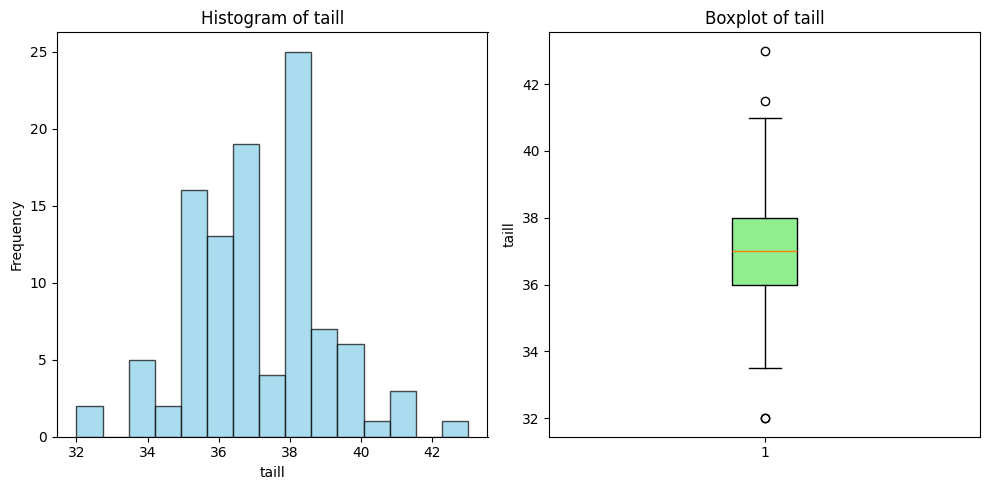

Y STATISTICS
Skewness ---- 0.163
Kurtosis ---- 0.412

footlgth


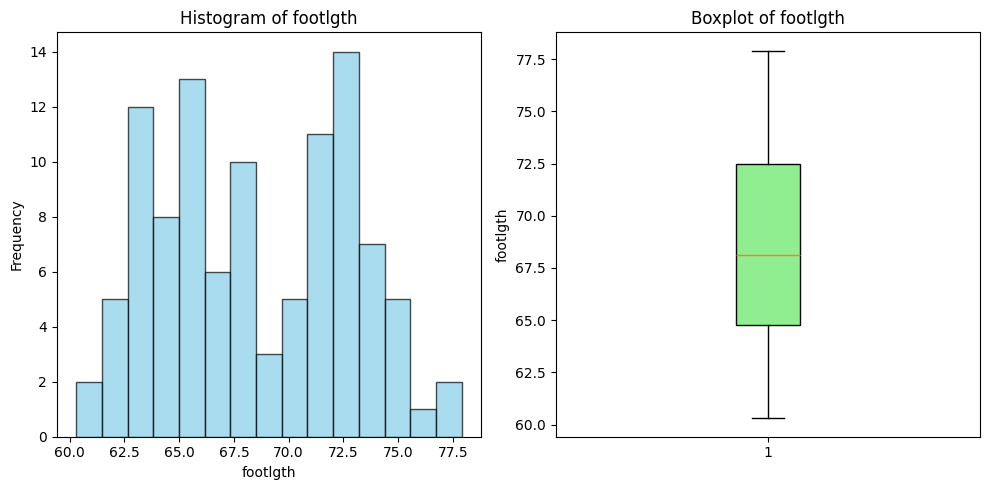

Y STATISTICS
Skewness ---- 0.089
Kurtosis ---- -1.156

footlgth


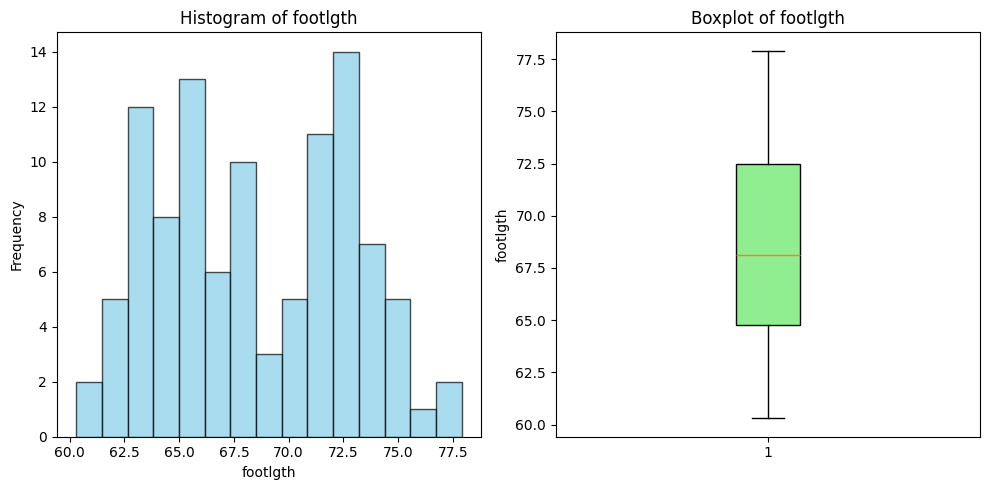

Y STATISTICS
Skewness ---- 0.089
Kurtosis ---- -1.156

earconch


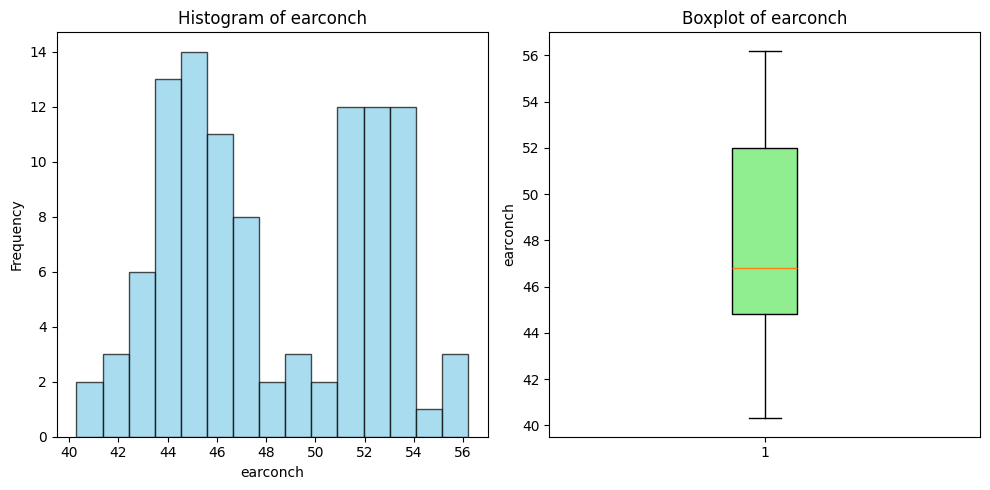

Y STATISTICS
Skewness ---- 0.150
Kurtosis ---- -1.353

eye


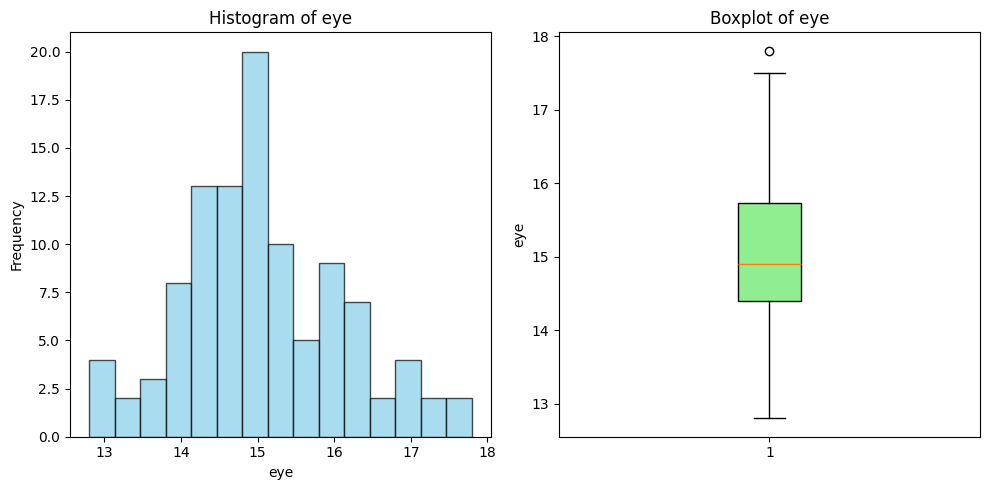

Y STATISTICS
Skewness ---- 0.390
Kurtosis ---- -0.005

chest


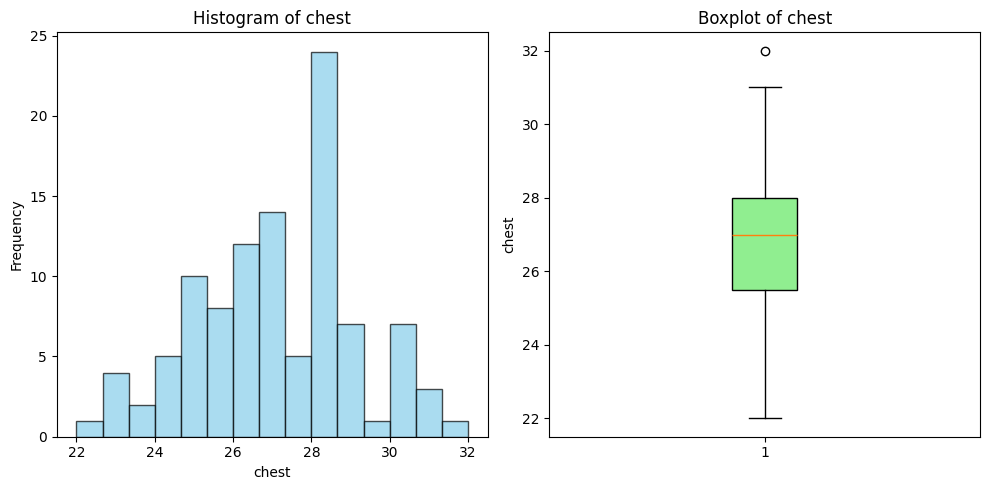

Y STATISTICS
Skewness ---- -0.055
Kurtosis ---- -0.325

belly


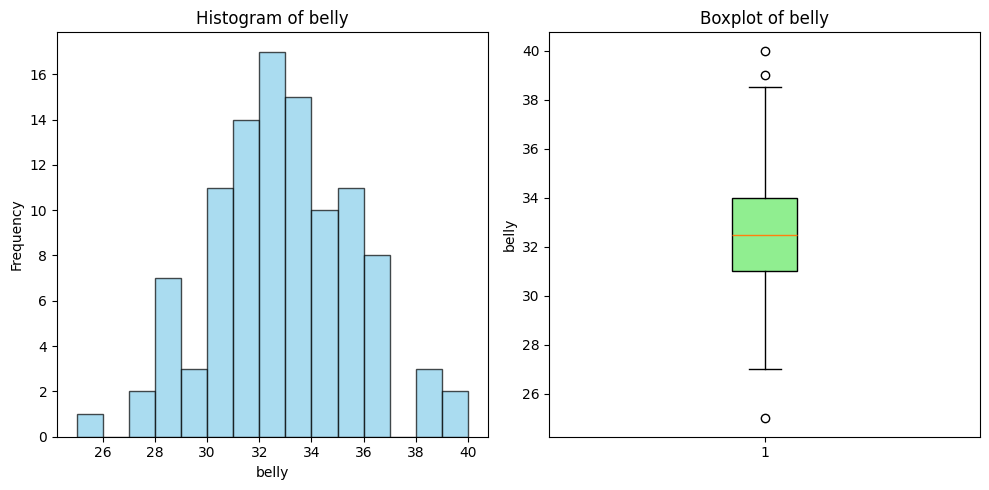

Y STATISTICS
Skewness ---- 0.089
Kurtosis ---- 0.220



In [28]:
# Checking for outliers, Skewness, Kurtosis.¶
coll_for_visu=["age","hdlngth","skullw","totlngth","taill","footlgth","footlgth","earconch","eye","chest","belly"]
def skewness_analysis(x:list):
    for y in x:
        print(y)
        plt.figure(figsize=(10, 5))
        # Histogram
        plt.subplot(1, 2, 1)
        plt.hist(df[y], bins=15, color='skyblue', edgecolor='black', alpha=0.7)
        plt.title(f'Histogram of {y}')
        plt.xlabel(y)
        plt.ylabel('Frequency')
        # Boxplot
        plt.subplot(1, 2, 2)
        plt.boxplot(df[y], vert=True, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
        plt.title(f'Boxplot of {y}')
        plt.ylabel(y)
        plt.tight_layout()
        plt.show()

        # Plain text output using "Y" as requested
        skew_val = skew(df[y])
        kurt_val = kurtosis(df[y])
        print("Y STATISTICS")
        print(f"Skewness ---- {skew_val:.3f}")
        print(f"Kurtosis ---- {kurt_val:.3f}\n")

skewness_analysis(coll_for_visu)

In [29]:
# Replacing the outliers with the median using IQR.
for z in coll_for_visu:
    Q1 = df[z].quantile(0.25)
    Q3 = df[z].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median_val = df[z].median()

    # Replace outliers with the median
    df.loc[(df[z] < lower_bound) | (df[z] > upper_bound), z] = median_val

age


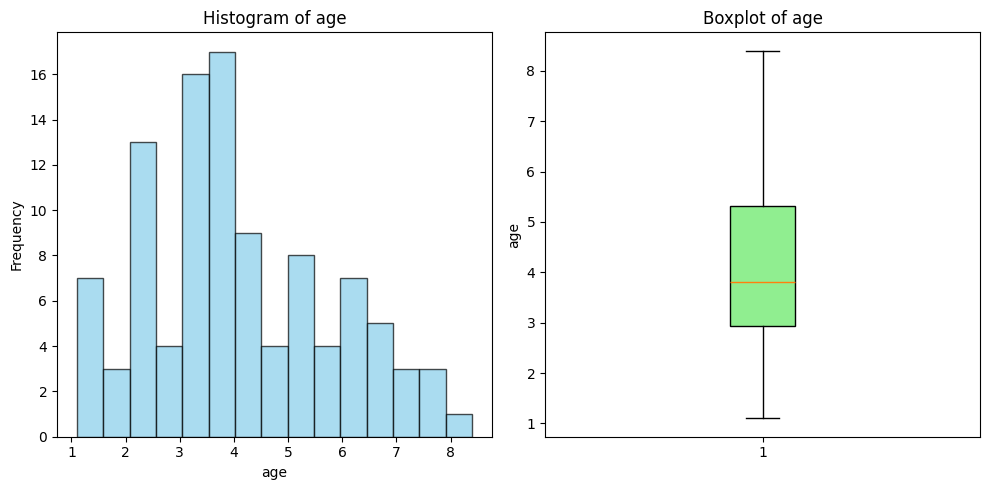

Y STATISTICS
Skewness ---- 0.432
Kurtosis ---- -0.565

hdlngth


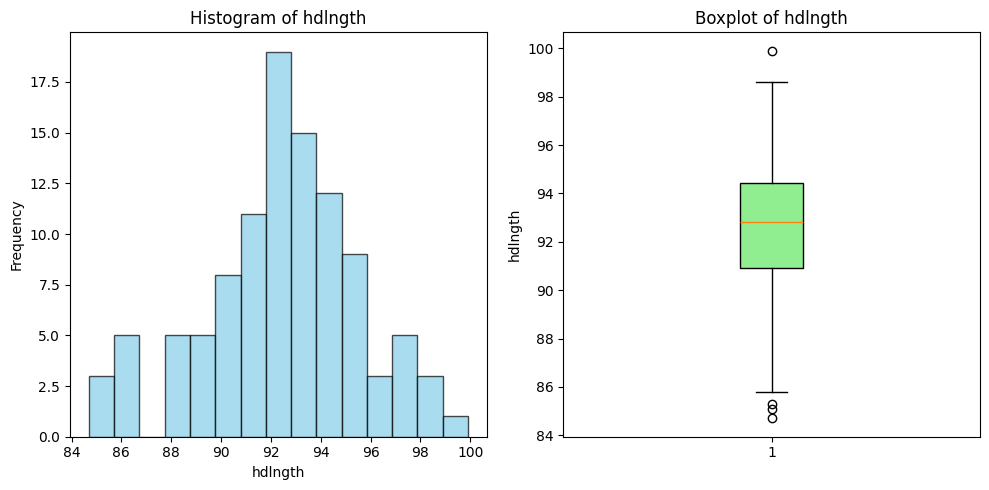

Y STATISTICS
Skewness ---- -0.360
Kurtosis ---- 0.194

skullw


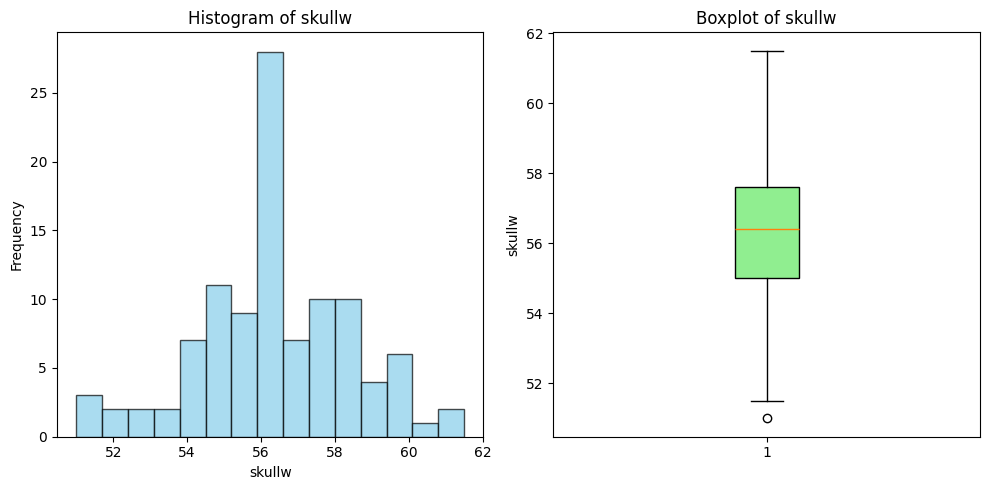

Y STATISTICS
Skewness ---- -0.141
Kurtosis ---- 0.156

totlngth


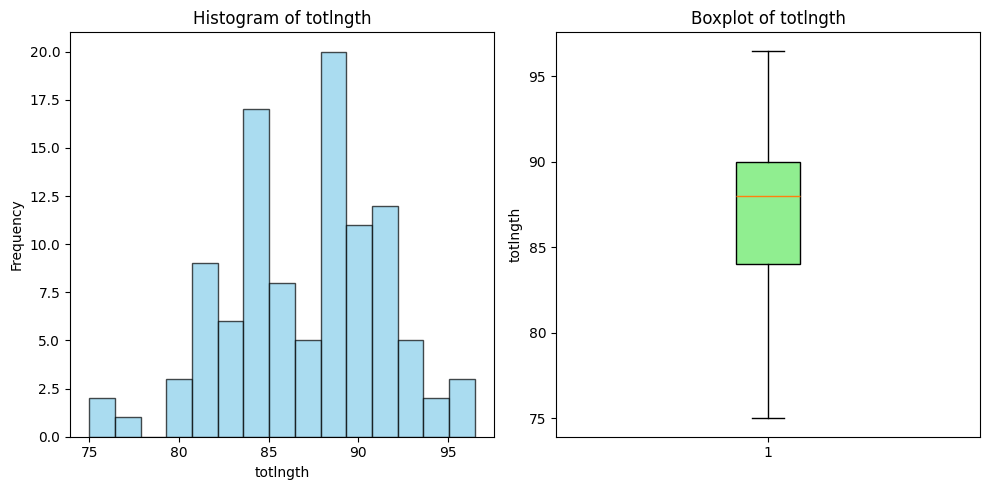

Y STATISTICS
Skewness ---- -0.274
Kurtosis ---- -0.146

taill


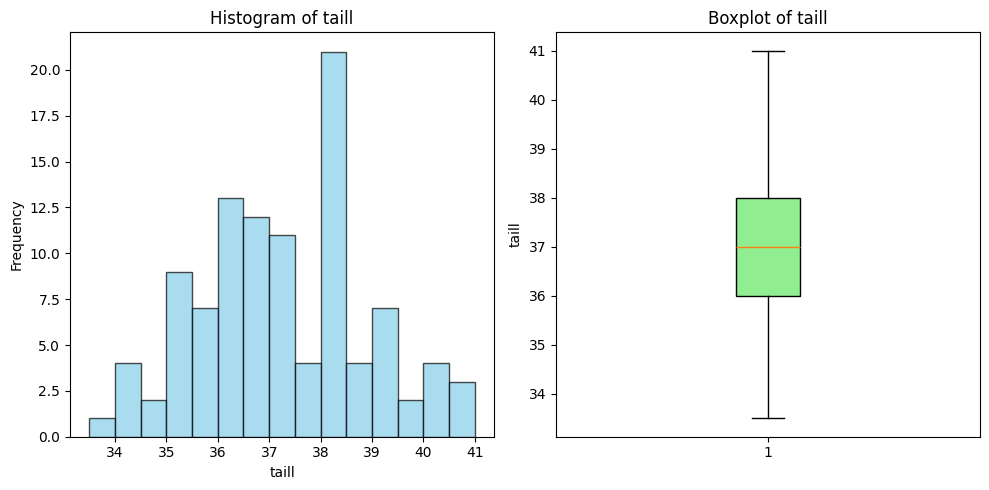

Y STATISTICS
Skewness ---- 0.175
Kurtosis ---- -0.415

footlgth


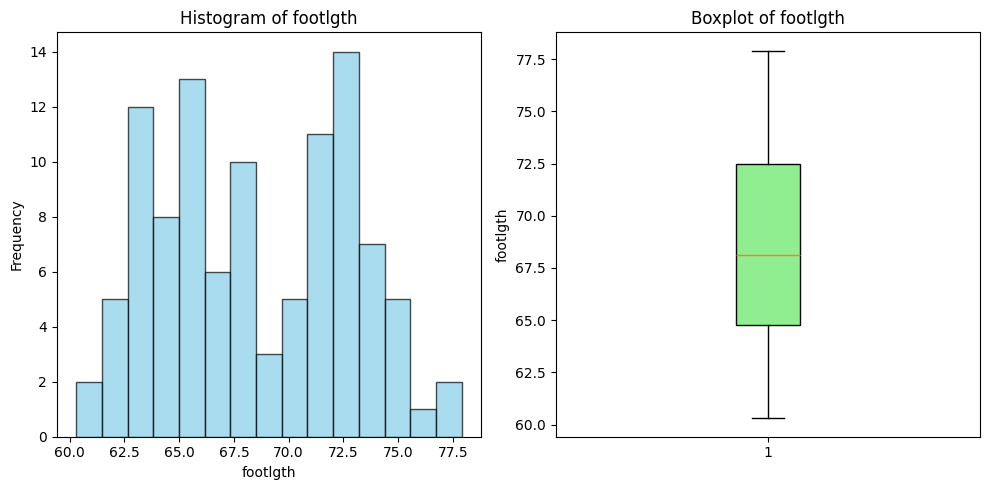

Y STATISTICS
Skewness ---- 0.089
Kurtosis ---- -1.156

footlgth


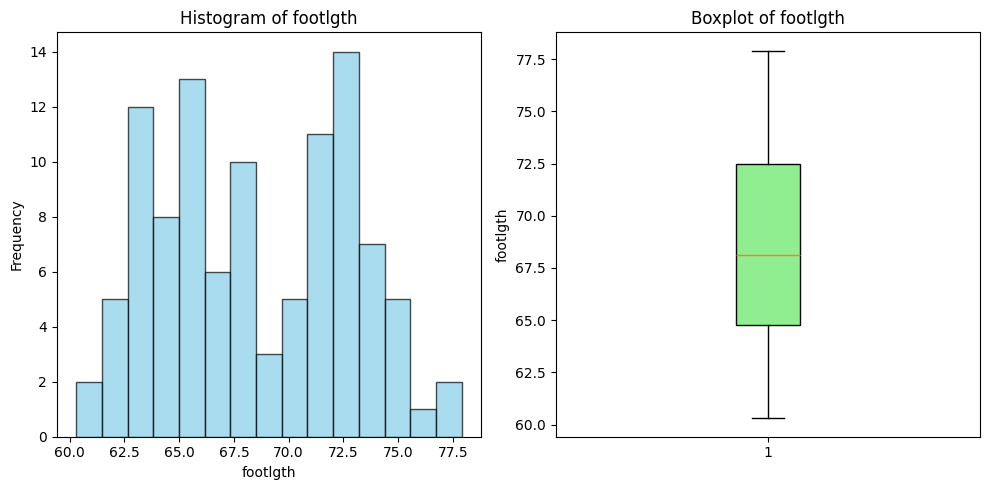

Y STATISTICS
Skewness ---- 0.089
Kurtosis ---- -1.156

earconch


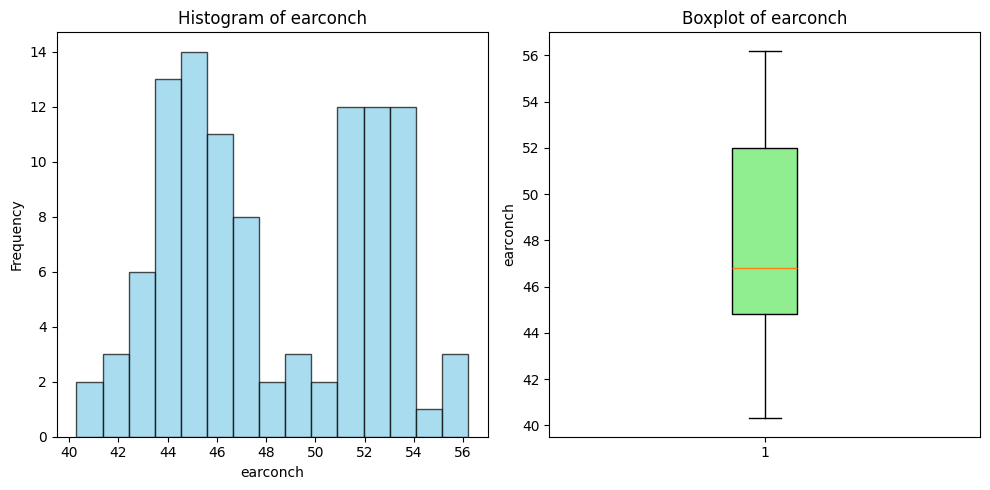

Y STATISTICS
Skewness ---- 0.150
Kurtosis ---- -1.353

eye


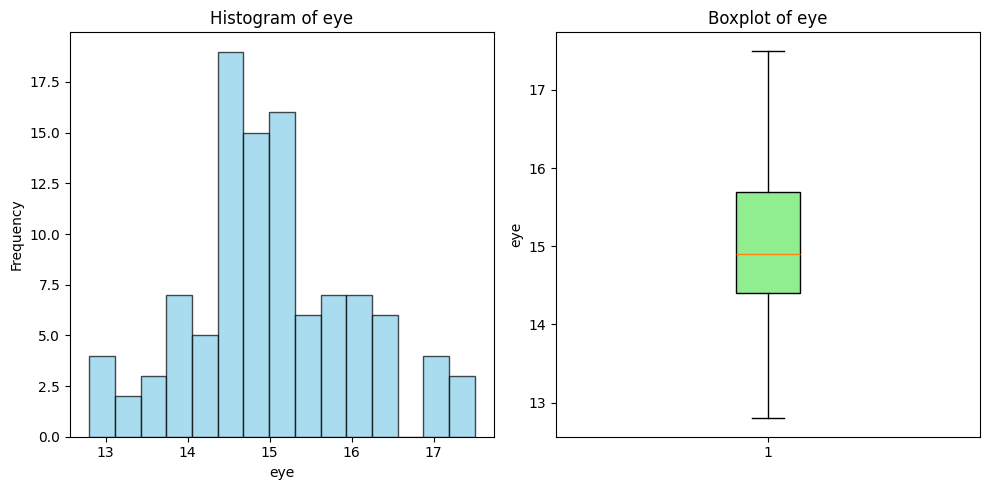

Y STATISTICS
Skewness ---- 0.320
Kurtosis ---- -0.059

chest


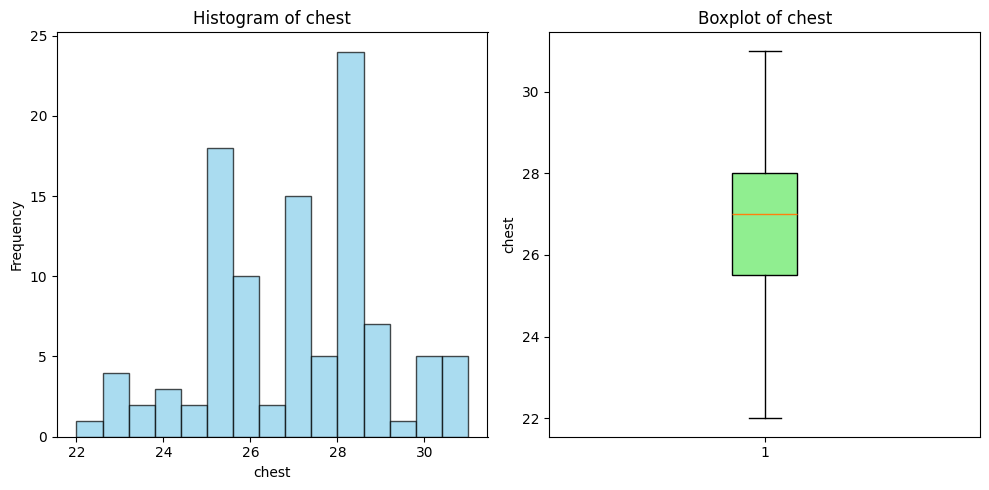

Y STATISTICS
Skewness ---- -0.143
Kurtosis ---- -0.394

belly


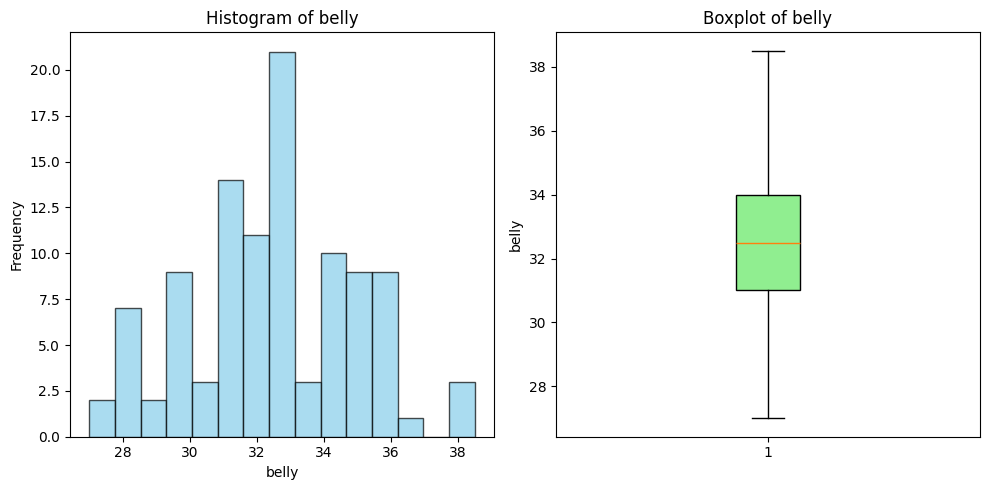

Y STATISTICS
Skewness ---- 0.035
Kurtosis ---- -0.176



In [30]:
# Result post converting the outlier to median using IQR.
skewness_analysis(coll_for_visu)

## Hypothesis 1

### Hypothesis Test: Head Length Differences Between Populations


In [31]:
from scipy import stats

# Hypothesis 1: There is a significant difference in head length (hdlngth) between the two population groups (Pop).
# H0: The mean hdlngth for 'Vic'== mean hdlngth for 'other'.
# H1: The mean hdlngth for 'Vic'== mean hdlngth for 'other'.

# Separate the data by population group
vic_hdlngth = df[df['Pop'] == 'Vic']['hdlngth']
other_hdlngth = df[df['Pop'] == 'other']['hdlngth']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(vic_hdlngth, other_hdlngth, equal_var=False) # Assuming unequal variances

# Print the results
print("Independent Samples t-test for head length between Pop groups:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the mean salaries of Company A and Company B.")
else:
    print("Fail to reject the null hypothesis. The data does not provide sufficient evidence that the mean salaries of Company A and Company B are different.")


Independent Samples t-test for head length between Pop groups:
t-statistic: 0.14655388255586219
p-value: 0.8837734658723418
Fail to reject the null hypothesis. The data does not provide sufficient evidence that the mean salaries of Company A and Company B are different.


## Hypothesis 2

### Hypothesis Test: Chest Size Differences Between Genders


In [32]:
from scipy.stats import ttest_ind

# Hypothesis 4: There is a significant difference in chest size (chest) between male and female possums (gender).
# H0: The mean chest size for male possums is equal to the mean chest size for female possums.
# H1: The mean chest size for male possums is not equal to the mean chest size for female possums.

# Separate the data by gender
male_chest = df[df['gender'] == 'm']['chest']
female_chest = df[df['gender'] == 'f']['chest']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(male_chest, female_chest, equal_var=False) # Assuming unequal variances

# Print the results
print("Independent Samples t-test for chest size between gender groups:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the mean salaries of Company A and Company B.")
else:
    print("Fail to reject the null hypothesis. The data does not provide sufficient evidence that the mean salaries of Company A and Company B are different.")


Independent Samples t-test for chest size between gender groups:
t-statistic: -1.7085215930059627
p-value: 0.09076629604568925
Fail to reject the null hypothesis. The data does not provide sufficient evidence that the mean salaries of Company A and Company B are different.


### Head Length vs Total Length


In [33]:
# Trying to predict y using x
x=df["totlngth"]
y=df["hdlngth"]

# Add a constant to the independent variable for the interpretataion.
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     70.87
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           2.50e-13
Time:                        03:08:09   Log-Likelihood:                -237.64
No. Observations:                 104   AIC:                             479.3
Df Residuals:                     102   BIC:                             484.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.2464      4.790     10.906      0.0


We checked how head length changes with total length. The model shows a positive trend: as total length increases, head length also increases. The R-squared is 0.41, meaning total length explains 41% of the variation. The coefficient is 0.46, and the result is statistically significant (p < 0.001).



### Head Length vs Skull Width

In [34]:
# Trying to preidct y using x
x=df["skullw"]
y=df["hdlngth"]

# Add a constant to the independent variable for the interpretation.
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                hdlngth   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     81.10
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.29e-14
Time:                        03:08:09   Log-Likelihood:                -234.65
No. Observations:                 104   AIC:                             473.3
Df Residuals:                     102   BIC:                             478.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.6298      6.211      5.897      0.0

We looked at how head length changes with skull width. The model shows a strong positive trend: as skull width increases, head length also increases. The R-squared is 0.443, so skull width explains 44% of the variation. The coefficient is 0.992, and the result is statistically significant (p < 0.001).



### Chest vs Belly


In [35]:
# Trying to preidct x using y
x=df["belly"]
y=df["chest"]

# Add a constant to the independent variable for the interpretation.
x=sm.add_constant(x)

model=sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  chest   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     38.21
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           1.32e-08
Time:                        03:08:09   Log-Likelihood:                -201.82
No. Observations:                 104   AIC:                             407.6
Df Residuals:                     102   BIC:                             412.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.1701      2.236      5.891      0.0

A simple linear regression shows a positive relationship between belly size and chest size. The R-squared is 0.273, meaning belly size explains 27% of the variation in chest size. The coefficient is 0.424, indicating that chest size increases by about 0.42 cm for every 1 cm increase in belly size. The result is statistically significant (p < 0.001).


### Multiple Linear Regression: Predicting Total Length

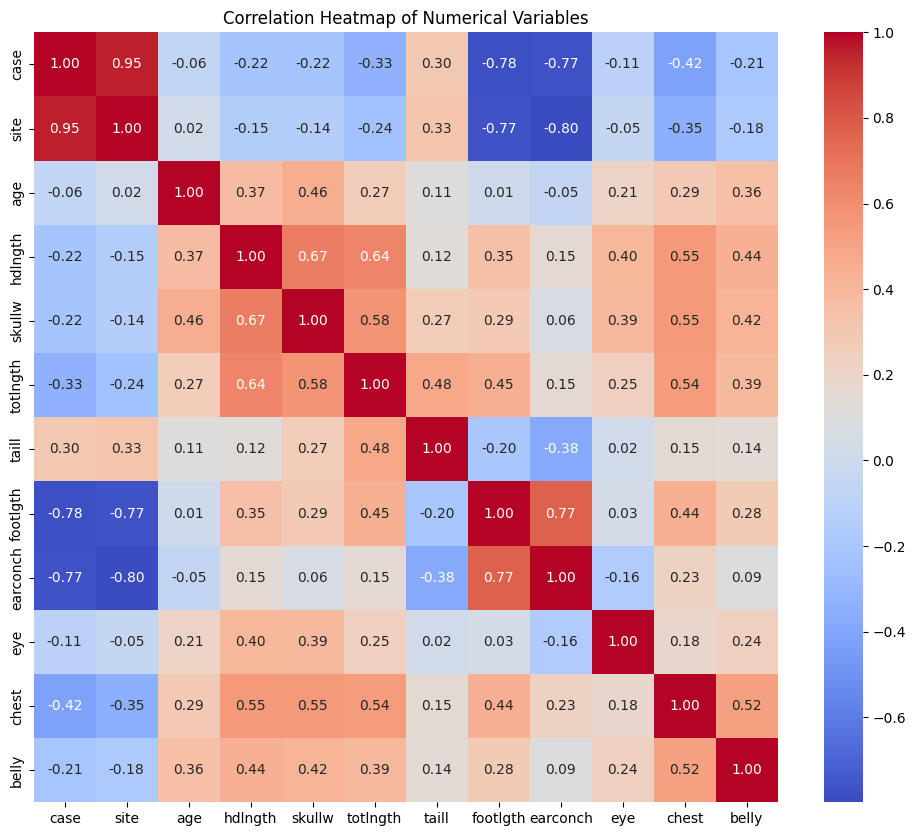

In [36]:
# Checking the correlation
import seaborn as sns
import matplotlib.pyplot as plt
numerical_cols = df.select_dtypes(include=np.number).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

 From the correlation analysis, we could see that column "totlngth" has a strong correalation with other numerical variables, which makes it suitable dependable variable for the multiple regression.

In [37]:
# Multiple Linear Regression
y = df['totlngth']

# Define the independent variables (X) - include as many as possible from numerical columns
# Exclude 'totlngth' itself and potentially highly correlated variables if multicollinearity is a concern
X = df[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Create and fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the regression
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               totlngth   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     26.68
Date:                Fri, 02 Jan 2026   Prob (F-statistic):           3.01e-22
Time:                        03:08:10   Log-Likelihood:                -232.93
No. Observations:                 104   AIC:                             485.9
Df Residuals:                      94   BIC:                             512.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -41.6505     10.059     -4.141      0.0


A multiple linear regression was used to predict total length (totlngth) from all other numerical measurements. The model has an R-squared of 0.719, meaning it explains about 72% of the variation in total length. Head length, tail length, and foot length are significant positive predictors. Other variables like age, skull width, earconch, eye, chest, and belly are not statistically significant in this model. This suggests that total length is mostly influenced by head, tail, and foot measurements in possums.
